## Explore distribution of alignment time constants per network

Should I do this for multiple seeds like in the original?

In [1]:
# read states from pkl files
import pickle
import numpy as np

statesOriginal = pickle.load(open('data/resStatesOriginal.pkl', 'rb'))
statesShifted = pickle.load(open('data/resStatesShifted.pkl', 'rb'))

# load states from several seeds
seedResStatesOriginal = []
seedResStatesShifted = []
original_seed_dir = 'data/resStatesOriginal/'
shifted_seed_dir = 'data/resStatesShifted/'

# collect all pkl files in each dir
import os
original_seed_files = os.listdir(original_seed_dir)
shifted_seed_files = os.listdir(shifted_seed_dir)

for file in original_seed_files:
    seedResStatesOriginal.append(pickle.load(open(original_seed_dir + file, 'rb')))

for file in shifted_seed_files:
    seedResStatesShifted.append(pickle.load(open(shifted_seed_dir + file, 'rb')))

In [5]:
# now calculate time constant (time for state to hit 1/2 of its max/initial value)
# begin/end reger to subset of states that has the different-to-same shift

timeconstants_per_network = {network: None for network in statesOriginal}

for network in statesOriginal:
    # resn = numNode
    # index = 0
    begin=433
    end=683
    data = statesOriginal[network][begin:end,:] - statesShifted[network][begin:end,:]
    # print(data.shape)
    dataT=data.T

    timeconstants = np.zeros(dataT.shape[0])
    res_maxes = np.zeros(dataT.shape[0])

    #calculate the alignment time:  dataT(neurons,time)
    #interate over reservoir neuron
    for neuron in range(dataT.shape[0]):
        # get the value
        max = abs(dataT[neuron,0])
        if max > -1:  #WAS 0.05
            for timestep in range(dataT.shape[1]):
                if abs(dataT[neuron,timestep]) < max/2:
                    timeconstants[neuron] = timestep
                    res_maxes[neuron] = max
                    max=-1     
                    
    save_timeconstants = timeconstants
    # timeconstants = np.sort(save_timeconstants)

    timeconstants_per_network[network] = save_timeconstants

In [ ]:
# get average time constant per network
avgs = {network: np.mean(timeconstants_per_network[network]) for network in timeconstants_per_network}
print(avgs)

{'DA': 14.258620689655173, 'DMN': 15.503623188405797, 'FP': 13.515625, 'LIM': 14.855670103092784, 'SM': 15.228310502283104, 'VA': 16.26923076923077, 'VIS': 14.099337748344372, 'Baseline': 18.49}


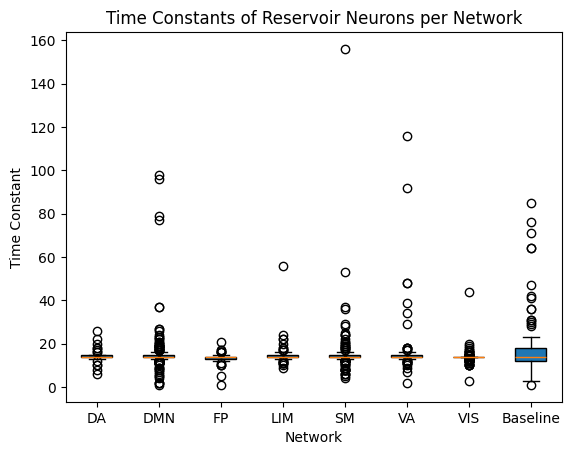

In [21]:
# now we can plot them as multiple boxplots

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.boxplot([timeconstants_per_network[network] for network in statesOriginal], patch_artist=True, vert=True)

ax.set_xticklabels(statesOriginal.keys())
ax.set_ylabel('Time Constant')
ax.set_xlabel('Network')
# ax.set_ylim(0,40)
plt.title('Time Constants of Reservoir Neurons per Network')
plt.show()


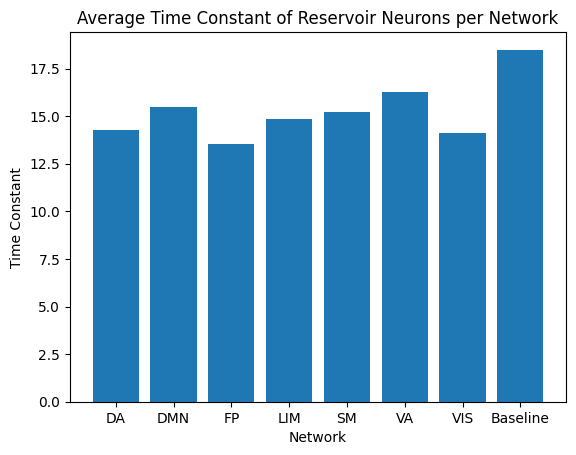

In [19]:
# plot the averages

fig, ax = plt.subplots()
ax.bar(avgs.keys(), avgs.values())
ax.set_ylabel('Time Constant')
ax.set_xlabel('Network')
plt.title('Average Time Constant of Reservoir Neurons per Network')
plt.show()

In [22]:
# normalize time constants by the number of neurons
numNeurons = {network: statesOriginal[network].shape[1] for network in statesOriginal}
timeconstants_per_network_normalized = {network: timeconstants_per_network[network]/numNeurons[network] for network in timeconstants_per_network}


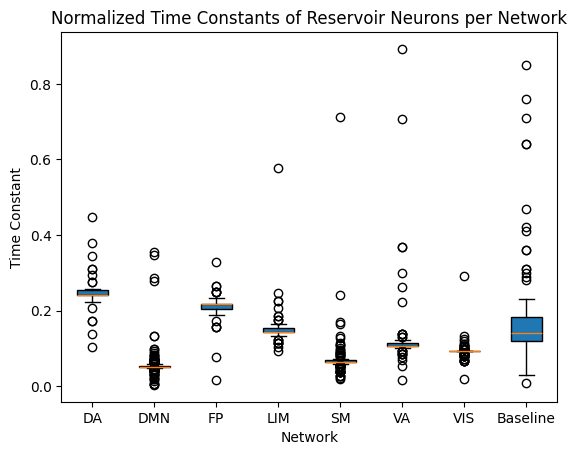

In [23]:
# now plot

fig, ax = plt.subplots()
ax.boxplot([timeconstants_per_network_normalized[network] for network in statesOriginal], patch_artist=True, vert=True)

ax.set_xticklabels(statesOriginal.keys())
ax.set_ylabel('Time Constant')
ax.set_xlabel('Network')
# ax.set_ylim(0,40)
plt.title('Normalized Time Constants of Reservoir Neurons per Network')
plt.show()

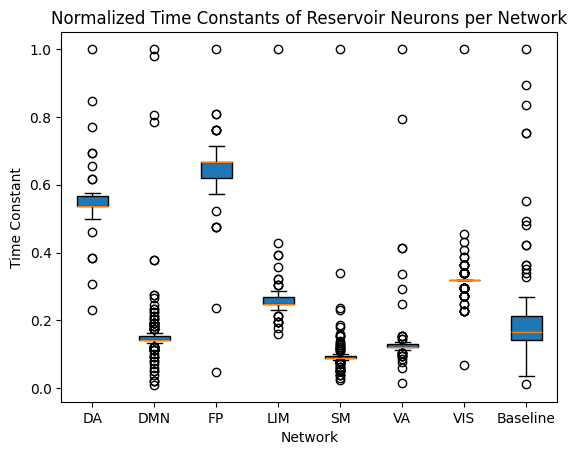

In [29]:
# normalize by the max value of the reservoir
timeconstants_per_network_normalized_max = {network: timeconstants_per_network[network]/np.max(timeconstants_per_network[network]) for network in timeconstants_per_network}

# now plot

fig, ax = plt.subplots()
ax.boxplot([timeconstants_per_network_normalized_max[network] for network in statesOriginal], patch_artist=True, vert=True)

ax.set_xticklabels(statesOriginal.keys())
ax.set_ylabel('Time Constant')
ax.set_xlabel('Network')
# ax.set_ylim(0,40)
plt.title('Normalized Time Constants of Reservoir Neurons per Network')
plt.show()

In [ ]:
# other normalization techniques?

after this point, dominey's code segments the states that are organized by timeconstants